# **Stat 6500 Excerise Set 2**
    Authored by Brian Lesko, a Graduate Researcher and Teaching Associate, a Masters of mechanical engineering student, studying mechatronic controls, robotics, and machine learning.

    This documenet is originally an interactive python notebook

    Contents: 
    
A. *An Introduction to Statistical Learning* Exercises

    1. Chapter 4: Question 14 (except part (g))
        Auto Dataset in the ISLR2 library, maintained by Carnegie Mellon University
        
    2. Chapter 5: Question 2

B. *Additional Exercises from Intructor Yookyung Lee* 

    1. Gradient and Hessian of the log liklihood function 

        hessian is found

        b c and d need finished

    2. False positive rate of a classifier given a vector of posterior probability estimates

# *An Introduction to Statistical Learning* 

## Chapter 4: Question 14 
(except part (g))
– The Auto dataset is available in the ISLR2 library. 
– Review the Lab in Section 4.7 and the R script for analysis of the spam dataset,
which will be useful for this question.

In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set.

In [199]:
# Import the Dataset
# Auto dataset is available in the ISLR2 library, maintained by Carnegie Mellon University

import pandas as pd

url = "https://github.com/JWarmenhoven/ISLR-python/raw/master/Notebooks/Data/Auto.csv"
df = pd.read_csv(url, na_values="?")
df = df.dropna()


In [200]:
# Inspect the data
print(df.head(3))
print('')
print(' The shape of the data is',df.shape)

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0    3504          12.0    70   
1  15.0          8         350.0       165.0    3693          11.5    70   
2  18.0          8         318.0       150.0    3436          11.0    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  

 The shape of the data is (392, 9)


    (a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() function. Note you may find it helpful to use the data.frame() function to create a single data set containing both mpg01 and the other Auto variables.

In [201]:

import numpy as np

# Calculate the median mpg value
median = np.median(df['mpg'])

# Add a new column to the dataframe that indicates whether the mpg value for each row is higher or lower than the median
df['above_median'] = np.where(df['mpg'] >= median, 1, 0)


In [202]:
# Inspect the data
print(df.head(3))
print('')
print(' The shape of the data is',df.shape)

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0    3504          12.0    70   
1  15.0          8         350.0       165.0    3693          11.5    70   
2  18.0          8         318.0       150.0    3436          11.0    70   

   origin                       name  above_median  
0       1  chevrolet chevelle malibu             0  
1       1          buick skylark 320             0  
2       1         plymouth satellite             0  

 The shape of the data is (392, 10)




    (b) Explore the data graphically in order to investigate the associ- ation between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01 Scatterplots and boxplots may be useful tools to answer this ques- tion. Describe your findings.


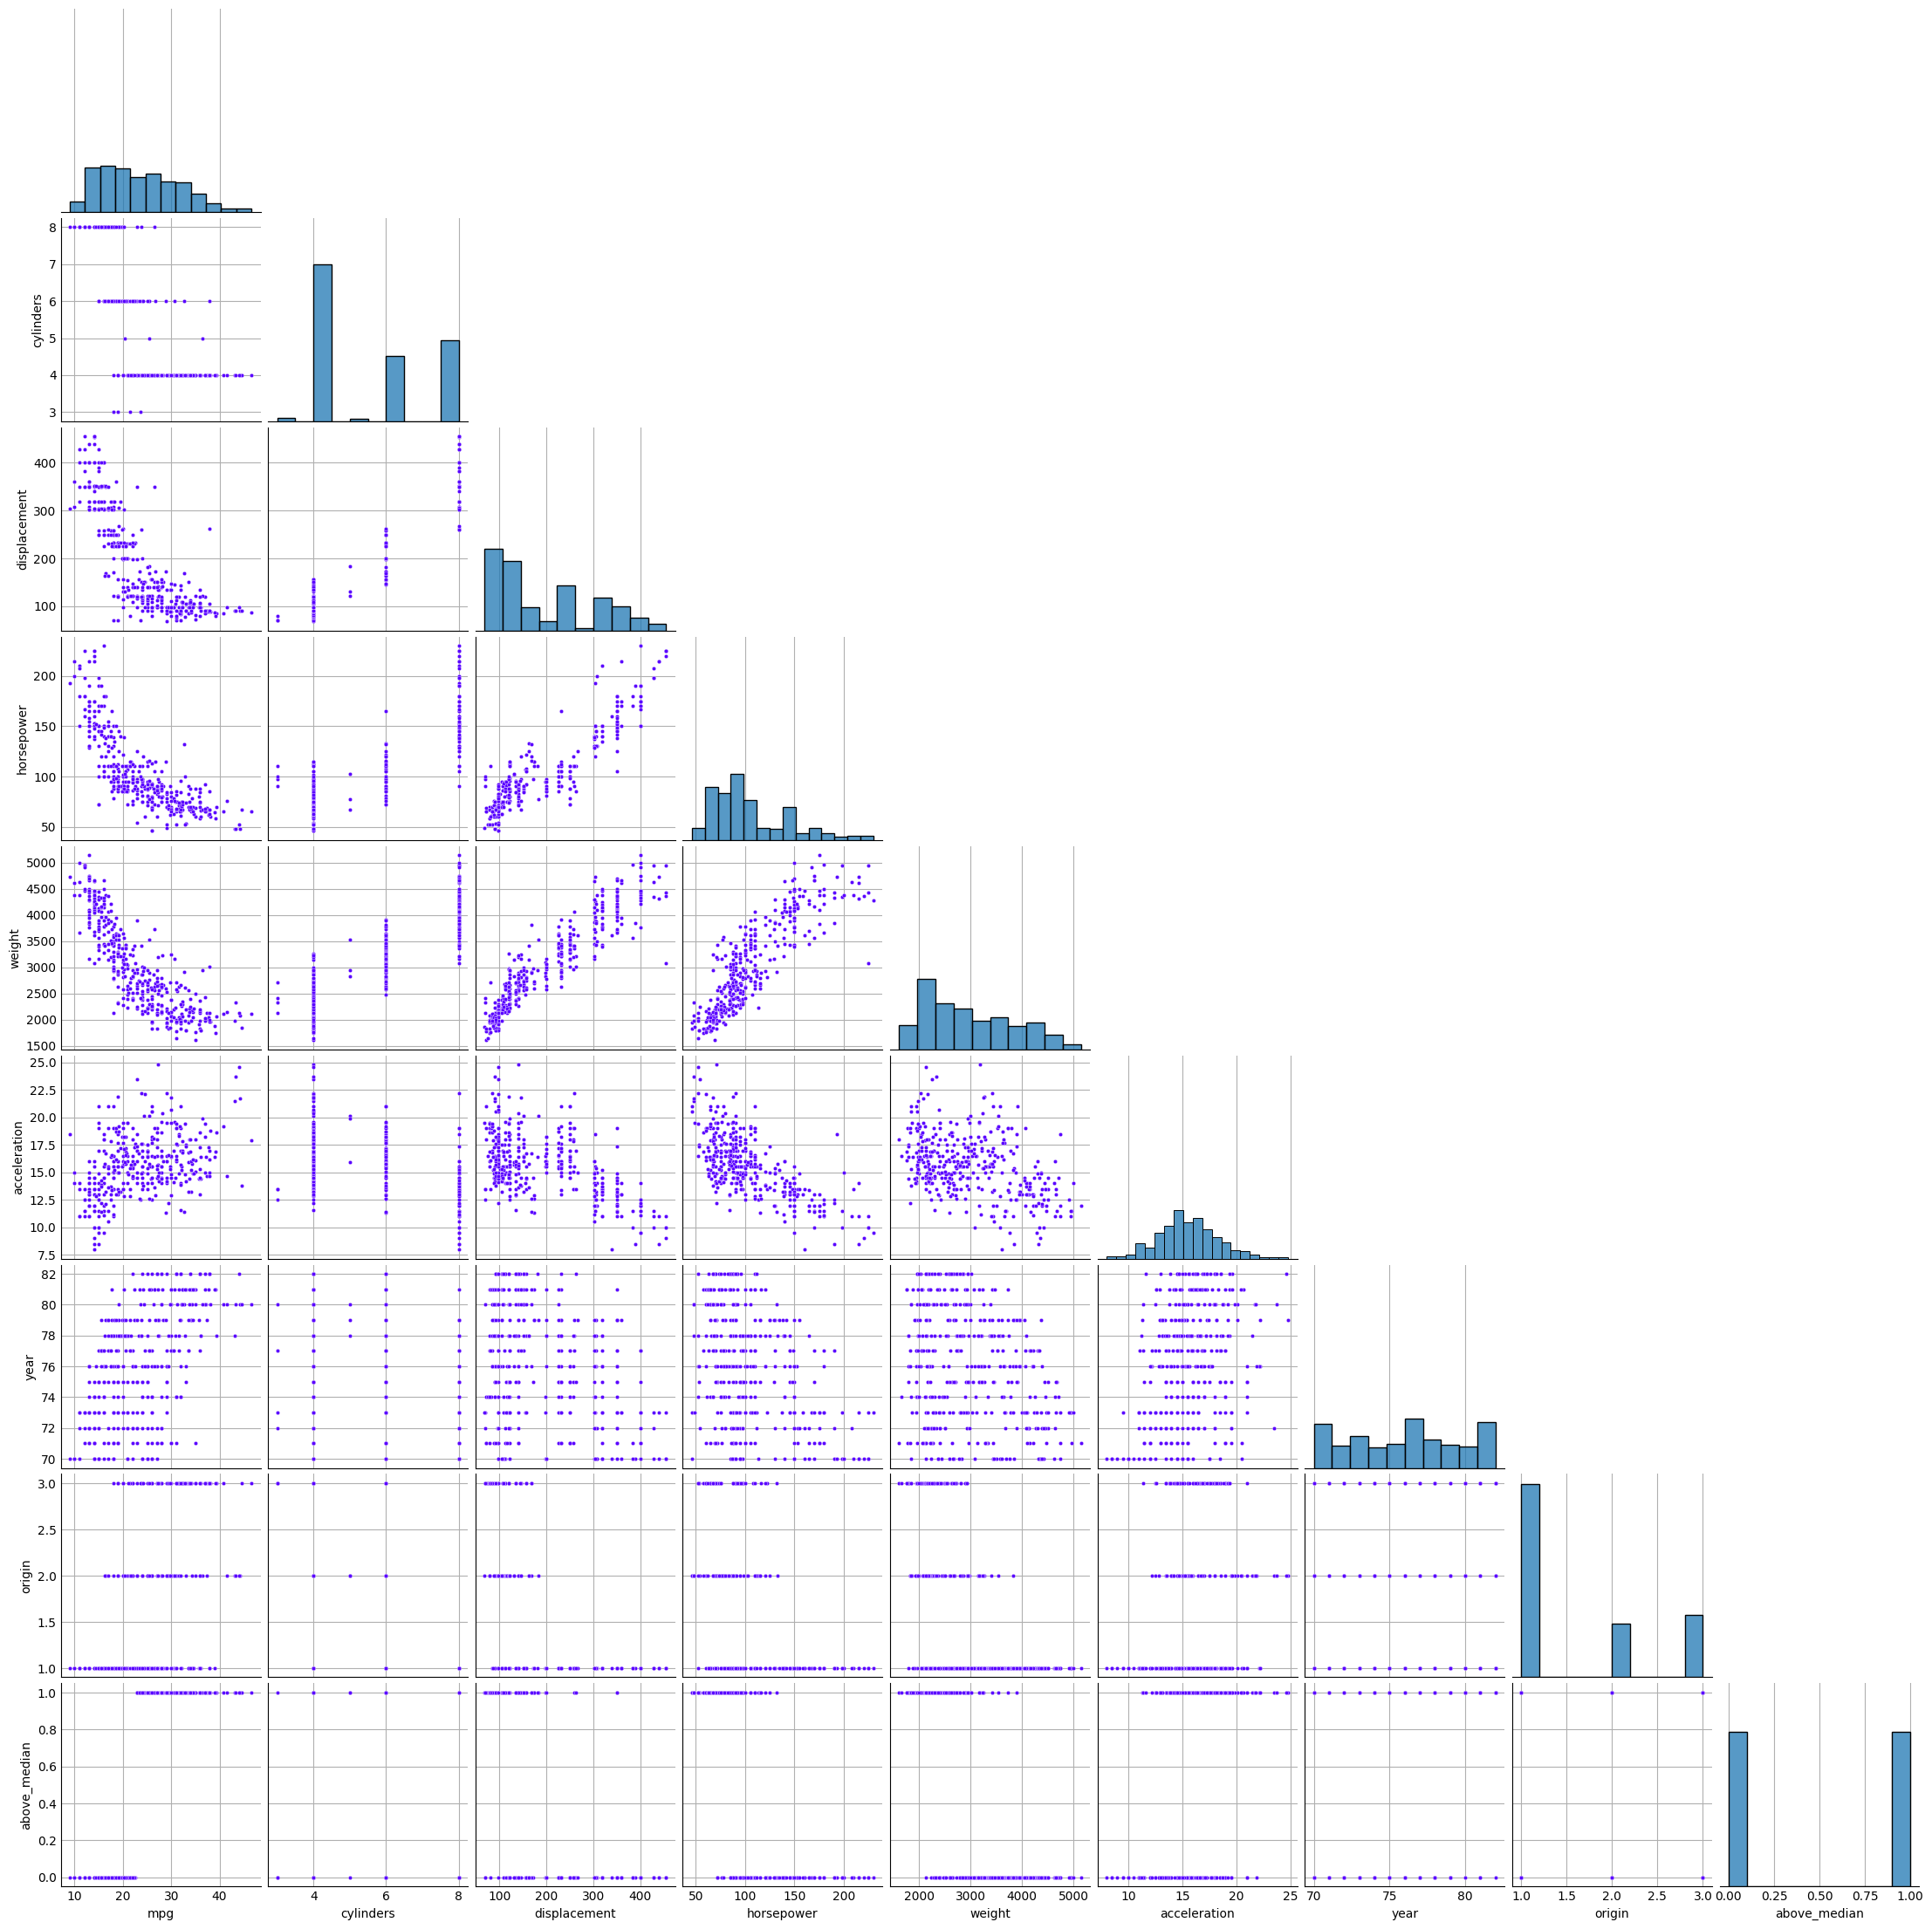

In [203]:
# Scatterplot method 1

# Define A Scatter Plot Matrix Function
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
# Create the pairplot
# Create the pairplot
g = sns.pairplot(df, diag_kind='hist', plot_kws={"s": 10, "color": "#5900FF"},corner=True)

plt.show()


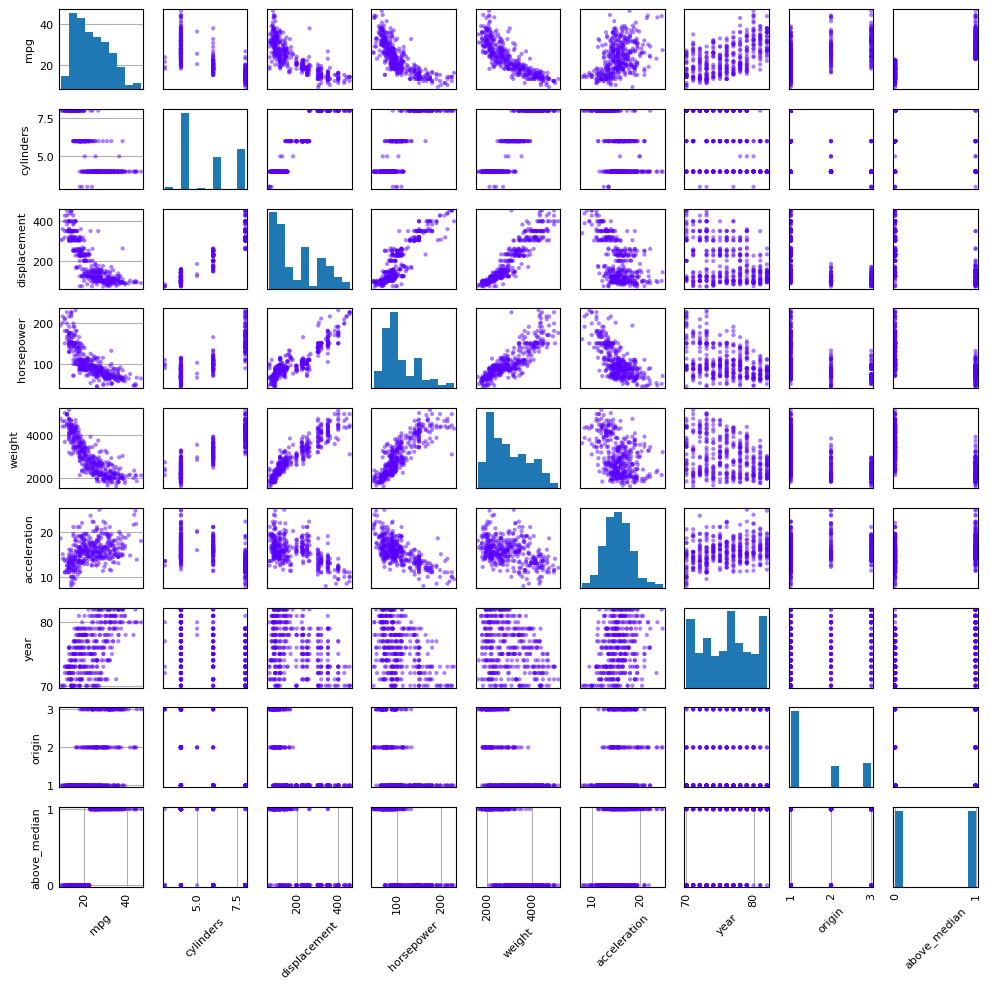

In [204]:
# Scatterplot method 2

import matplotlib.pyplot as plt
import pandas as pd

def scatter_matrix(data, color='#5900FF'):
    scatter_matrix = pd.plotting.scatter_matrix(data, alpha=0.5, figsize=(10,10), diagonal='hist', color=color)
    for ax in scatter_matrix.ravel():
        ax.set_xlabel(ax.get_xlabel(), fontsize = 8, rotation = 45)
        ax.set_ylabel(ax.get_ylabel(), fontsize = 8, rotation = 90)
    plt.tight_layout()
    plt.show()

scatter_matrix(df, color='#5900FF')




### There appears to be a relatively strong relationship between mpg (and also the new hot coded variable) and year, weight, horsepower, and displacement where the latter 3 are mildy nonlinear 

However, I choose to only use weight and acceleration because it is likely that weight horsepower and displacement are related

In [205]:
# Extracting the important variables

# the most associated variables
cols = ['acceleration','weight']
X = df[cols]
print('the shape of X is',X.shape)
# the target 
y = df['above_median']
print('the shape of y is',y.shape)
#print(head(X))

the shape of X is (392, 2)
the shape of y is (392,)


    c) Split the data

In [206]:
# Splitting the data into train and test

from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

print('The size of X_train is',X_train.shape,'The sahep of y_train is',y_train.shape)
print('The size of X_test is',X_test.shape,'The sahep of y_test is',y_test.shape)

print(X_train.head(3))
print(y_train.head(3))


The size of X_train is (314, 2) The sahep of y_train is (314,)
The size of X_test is (78, 2) The sahep of y_test is (78,)
   acceleration  weight
0          12.0    3504
1          11.5    3693
2          11.0    3436
0    0
1    0
2    0
Name: above_median, dtype: int64


    (d) Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

Plotting the test and Training data as different colors

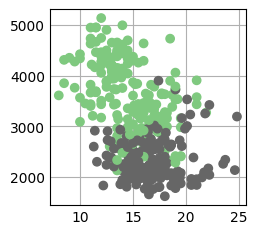

In [207]:
import matplotlib.pyplot as plt

# Define the hex codes for the two colors
train_color = "#FF5733"
test_color = "#33FFA8"

plt.style.use('_mpl-gallery')

# Plot
fig, ax = plt.subplots()

ax.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train,cmap='Accent')
ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test,cmap='Accent')


plt.show()

In [208]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# fit the model
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)

# Predict using the fit model
y_pred = LDA.predict(X_test)

# Error rate
from sklearn.metrics import accuracy_score
error_rate = 1 - accuracy_score(y_test, y_pred)
print('The test error rate of the LDA model is',error_rate)


The test error rate of the LDA model is 0.14102564102564108


    (e) Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [209]:

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# fit the model
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train, y_train)

# Predict using the fit model
y_pred2 = QDA.predict(X_test)

# Error rate
from sklearn.metrics import accuracy_score
error_rate2 = 1 - accuracy_score(y_test, y_pred2)
print('The test error rate of the QDA model is',error_rate2)

The test error rate of the QDA model is 0.15384615384615385


    (f) Perform logistic regression on the training data in order to pre- dict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [210]:
from sklearn.linear_model import LogisticRegression

# fit the model
Log = LogisticRegression(random_state=0)
Log.fit(X_train, y_train)

# Predict using the fit model
y_pred3 = Log.predict(X_test)

# Error rate
from sklearn.metrics import accuracy_score
error_rate3 = 1 - accuracy_score(y_test, y_pred3)
print('The test error rate of the Log model is',error_rate3)


The test error rate of the Log model is 0.11538461538461542


    (g) Perform naive Bayes on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [211]:
from sklearn.naive_bayes import GaussianNB

# fit the model
gNaiveBayes = GaussianNB()
gNaiveBayes.fit(X_train, y_train)

# Predict using the fit model
y_pred4 = gNaiveBayes.predict(X_test)

# Error rate
from sklearn.metrics import accuracy_score
error_rate4 = 1 - accuracy_score(y_test, y_pred4)
print('The test error rate of the Log model is',error_rate4)

The test error rate of the Log model is 0.15384615384615385



    (h) Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that seemed most associated with mpg01 in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?

In [212]:
from sklearn.neighbors import KNeighborsClassifier

# fit the model
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)

# Predict using the fit model
y_pred5 = KNN.predict(X_test)

# Error rate
from sklearn.metrics import accuracy_score
error_rate5 = 1 - accuracy_score(y_test, y_pred5)
print('The test error rate of the Log model is',error_rate5)

The test error rate of the Log model is 0.15384615384615385


## Chapter 5: Question 2 , Bootstrap samples

    2. We will now derive the probability that a given observation is part of a bootstrap sample. Suppose that we obtain a bootstrap sample from a set of n observations.

Bootstrap involves sampling from given data where observations are replaced

    (a) What is the probability that the first bootstrap observation is not the jth observation from the original sample? Justify your answer.

p(the first bootstrap sample not being the jth observation of the original sample)

= p(the first entry of the bootstrap being anything else)

= (n - 1) / n

    (b) What is the probability that the second bootstrap observation is not the jth observation from the original sample?

p(the second observation in the bootstrap sample is not equal to the jth original sample)

= (n-1) / n , because there is replacement 

    (c) Argue that the probability that the jth observation is not in the bootstrap sample is (1 − 1/n)n.

p(the jth observation is not in the bootstrap sample)

= p(the First bootstrap sample not being the jth observation of the original sample) * 

  p(the Second bootstrap sample not being the jth observation of the original sample) * 

  p(the Third bootstrap sample not being the jth observation of the original sample) * ...

= ((n-1) / n)^(bootstrap sample size)

= ((n-1) / n)^n

= (1 - 1/n)^n , which agrees with the question

    (d) When n = 5, what is the probability that the jth observation is in the bootstrap sample?

given n = 5

p(the jth observation *is* in the bootstrap sample) = 1 - p(the jth observation *is not* in the bootstrap sample)

= 0.6723


    (e) When n = 100, what is the probability that the jth observation is in the bootstrap sample?

given n = 100

p(the jth observation *is* in the bootstrap sample) = 1 - p(the jth observation *is not* in the bootstrap sample)

= 0.634

    (f) When n = 10, 000, what is the probability that the jth observa- tion is in the bootstrap sample?

given n = 10,000

p(the jth observation *is* in the bootstrap sample) = 1 - p(the jth observation *is not* in the bootstrap sample)

= 0.632139


    (g) Create a plot that displays, for each integer value of n from 1 to 100,000, the probability that the jth observation is in the bootstrap sample. Comment on what you observe.


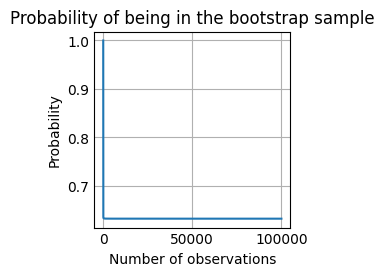

The probability of the boostrap sample containing the entry j very quickly approaches 0.6321


In [213]:
# import numpy as np
import numpy as np
import matplotlib.pyplot as plt


# Create a vector from 1 to 100000 with a step of 1
x = np.arange(1, 100001, 1)

# Create a vector of the probability of being in the bootstrap sample
y = 1-(1 - 1/x)**x

# Plot the results
plt.plot(x, y)

# Add a title and axis labels
plt.title('Probability of being in the bootstrap sample')
plt.xlabel('Number of observations')
plt.ylabel('Probability')

# Show the plot
plt.show()

#format a print of the first four digits of y[99999]
print('The probability of the boostrap sample containing the entry j very quickly approaches',"{:.4f}".format(y[99999]))

    (h) We will now investigate numerically the probability that a boot- strap sample of size n = 100 contains the jth observation. Here j = 4. We repeatedly create bootstrap samples, and each time we record whether or not the fourth observation is contained in the bootstrap sample.

In [214]:
# create originalSample, a vector from 1 to 100 with a step of 1
originalSample = np.arange(1, 101, 1)


# create an empty list to store the bootstrap samples
bootstrapSamples = []

# create a vecrtor of zeros to mark if any entry of the bootstrap sample is the fourth observation of the original sample
bootstrapSamplesContainFourthObs = np.zeros(1000)

# a for loop, which will run 1000 times
for i in range(1000):
    # create a bootstrap sample, a vector of 100 random numbers from 1 to 100
    bootstrapSample = np.random.choice(originalSample, size=100, replace=True)
    # append the bootstrap sample to the list bootstrapSamples
    bootstrapSamples.append(bootstrapSample)
    # if the fourth observation of the original sample is in the bootstrap sample, mark the corresponding entry of bootstrapSamplesContainFourthObs as 1
    if 4 in bootstrapSample:
        bootstrapSamplesContainFourthObs[i] = 1

# calculate the probability of the bootstrap sample containing the fourth observation of the original sample
prob = np.mean(bootstrapSamplesContainFourthObs)
print('The probability of the bootstrap sample containing the fourth observation of the original sample is',"{:.4f}".format(prob))



The probability of the bootstrap sample containing the fourth observation of the original sample is 0.6430


## Additional Exercise 2
False positive rate of a classifier given a vector of posterior probability estimates

    (a). Write a computer code for a function that takes pˆ, y and value c as input and outputs the false positive rate and the true positive rate.

In [215]:
n = 1000
# create a vector of posterior probabilities of length n, each entry is randomly generated between 0 and 1
posteriorProb = np.random.uniform(0, 1, n)
phat = posteriorProb

# Create Observed class labels where the label is 0 or 1 depending on if the phat entry is greater than c
realc = .5
classLabel = np.where(phat > realc, 1, 0)

cguess = 0.4

#define a function that takes p, y, and c as phat classLabel and c and outputs the false possitive rate and true positive rate
def ROC(p, y, c):
    # where c is the prediction threshold estimate
    # where y are the true class labels 
    # where p are the posterior probabilities

    n = len(p)

    predictedClass = np.where(p > c, 1, 0)
    realClass = y

    # the number of true negative observations
    TN = np.sum((realClass == 0) & (predictedClass == 0))
    # the number of true positive observations
    TP = np.sum((realClass == 1) & (predictedClass == 1))
    # the number of false negative observations
    FN = np.sum((realClass == 1) & (predictedClass == 0))
    # the number of false positive observations
    FP = np.sum((realClass == 0) & (predictedClass == 1))

    falsePositiveRate = FP/(FP+TN)
    truePositiveRate = TP/(TP+FN)

    print('for a cutoff of',c)
    print('The false positive rate is',falsePositiveRate)
    print('The true positive rate is',truePositiveRate)
    print('')

    # Return the false positive rate and true positive rate
    return falsePositiveRate, truePositiveRate

falsePositiveRate, truePositiveRate = ROC(phat, classLabel, cguess)

print('This result makes sense because the cutoff guess is lower than the actual class cutoff, so the true positive rate is 1 while the false positive rate is near cguess/c')


for a cutoff of 0.4
The false positive rate is 0.20866141732283464
The true positive rate is 1.0

This result makes sense because the cutoff guess is lower than the actual class cutoff, so the true positive rate is 1 while the false positive rate is near cguess/c


    (b) For simulation, generate pˆ and two versions of y using the code below.
         n <- 100
         p <- runif(n)  # generate n values from uniform(0,1)
         y <- rbinom(n, 1, p) # generate n class labels y_i from B(1, p_i)
         y0 <- rbinom(n, 1, 0.5) # generate class labels y_i from B(1, 0.5)

In [216]:
# in python instead of R 
n = 100
# the runif(n) function from R but in python
p = np.random.uniform(0, 1, n)
# generate n class labels y, from the binomial distribution with n=1 and p=p
y = np.random.binomial(1, p, n)
# generate another n class labels y0 from the binomial distribution with n=1 and p=0.5
y0 = np.random.binomial(1, 0.5, n)

    The first version y is related to the probabilities in p (representing an informative classifier) while the second version y0 is independent of p (to be taken as a random guessing). Using your function in (a), find the false positive rate and the true positive rate when c = 0, 0.5 and 1 for each version of y.

In [217]:

print('For y, an informed classifier')
for c in np.arange(0, 1.1, 0.5):
    # call the ROC function with p, y, and c
    falsePositiveRate, truePositiveRate = ROC(p, y, c)

print('For y0, an uninformed classifier')
for c in np.arange(0, 1.1, 0.5):
    # call the ROC function with p, y0, and c
    falsePositiveRate, truePositiveRate = ROC(p, y0, c)


For y, an informed classifier
for a cutoff of 0.0
The false positive rate is 1.0
The true positive rate is 1.0

for a cutoff of 0.5
The false positive rate is 0.22641509433962265
The true positive rate is 0.723404255319149

for a cutoff of 1.0
The false positive rate is 0.0
The true positive rate is 0.0

For y0, an uninformed classifier
for a cutoff of 0.0
The false positive rate is 1.0
The true positive rate is 1.0

for a cutoff of 0.5
The false positive rate is 0.5185185185185185
The true positive rate is 0.391304347826087

for a cutoff of 1.0
The false positive rate is 0.0
The true positive rate is 0.0



    (c) Plot the ROC curve with each version of y by varying the value c from 0 to 1. Comment on the difference between the two ROC curves.

for a cutoff of 0.0
The false positive rate is 1.0
The true positive rate is 1.0

for a cutoff of 0.01
The false positive rate is 1.0
The true positive rate is 1.0

for a cutoff of 0.02
The false positive rate is 0.9622641509433962
The true positive rate is 1.0

for a cutoff of 0.03
The false positive rate is 0.9245283018867925
The true positive rate is 1.0

for a cutoff of 0.04
The false positive rate is 0.8867924528301887
The true positive rate is 1.0

for a cutoff of 0.05
The false positive rate is 0.8867924528301887
The true positive rate is 1.0

for a cutoff of 0.06
The false positive rate is 0.8679245283018868
The true positive rate is 1.0

for a cutoff of 0.07
The false positive rate is 0.8679245283018868
The true positive rate is 1.0

for a cutoff of 0.08
The false positive rate is 0.8490566037735849
The true positive rate is 1.0

for a cutoff of 0.09
The false positive rate is 0.8301886792452831
The true positive rate is 1.0

for a cutoff of 0.1
The false positive rate is 0.83

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


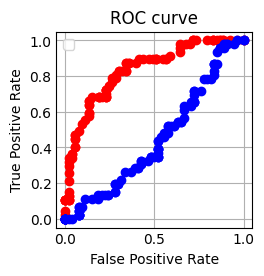

In [218]:
# plot the ROC curve for each version of y, y and y0 by varying c from 0 to 1

# plot the ROC curve for y
for c in np.arange(0, 1.1, 0.01):
    # call the ROC function with p, y, and c
    falsePositiveRate, truePositiveRate = ROC(p, y, c)
    # plot the false positive rate and true positive rate
    plt.plot(falsePositiveRate, truePositiveRate, 'ro')

# plot the ROC curve for y0
for c in np.arange(0, 1.1, 0.01):
    # call the ROC function with p, y0, and c
    falsePositiveRate, truePositiveRate = ROC(p, y0, c)
    # plot the false positive rate and true positive rate
    plt.plot(falsePositiveRate, truePositiveRate, 'bo')

# add a title and axis labels and a legend
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# add a legend to the plot
plt.legend()


y0 prioritizes keeping false positive and true positive rates about equal while the y curve prioritizes keeping the true positive rate high  and the false positive rate low for smaller c's